In [300]:
import numpy as np
import pandas as pd
import matplotlib

In [301]:
matplotlib.__version__

'3.1.3'

### Backends

Matplotlib has multiple `backends` that handle converting Matplotlib's in-memory representation of your plot into the colorful output you can look at.
Backends allow to use matplotlib on any system.

In [342]:
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

inline backend - jupyter buitin backend.

In [343]:
# We can change backend as following 
matplotlib.use('nbagg')
matplotlib.get_backend()

'nbAgg'

* We must change backend before we import matplotlib.pyplot

In [344]:
import matplotlib.pyplot as plt
%matplotlib inline

* We can also set the backend via an 'ipython magic' %matplotlib backend_name. 
For ex %matplotlib inline

<p>In addition to setting the backend, the ipython magic also calls plt.ion(), which puts Matplotlib in 'interacitve mode'. In 'interactive mode' figures are shown as soon as they are created. The inverse is plt.ioff() in which figures are not shown until you explicitly call plt.show().
</p>

In [305]:
import pandas as pd

In [306]:
players = pd.read_csv('players.csv')

In [11]:
players.head(3)

,Name,Country,Matches,Bat_Avg,Centuries,Highest_Score,Runs,Ducks
0,Bradman,Aus,52,99.94,29,334,6996,7
1,Sobers,WI,93,57.78,26,365,8032,12
2,Sangakarra,SL,134,57.40,38,319,12400,11


In [312]:
%matplotlib inline
plt.style.use('default')

### Horizontal BarPlot
<b>Color the bars based on data</b>

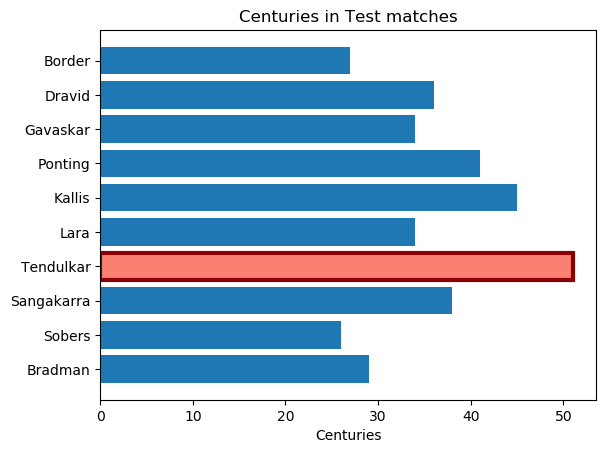

In [315]:
fig, ax = plt.subplots()

bars = ax.barh('Name', 'Centuries',  data=players)
ax.set_xlabel('Centuries')
ax.set_title('Centuries in Test matches')

for bar, cent in zip(bars, players.Centuries):
    if cent == players.Centuries.max():
        bar.set(edgecolor='darkred', facecolor='salmon', linewidth=3)

plt.show()

### Stacked barplot

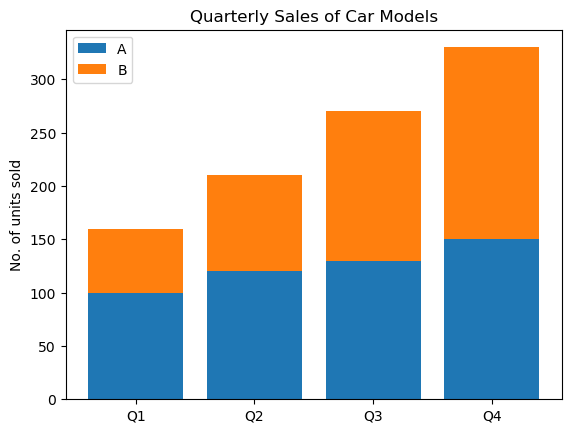

In [316]:
# Quarterly Sales of two car models

quarters = ['Q1','Q2','Q3','Q4']
modelA = [100, 120, 130, 150]
modelB = [60, 90, 140, 180]

fig, ax = plt.subplots()

ax.bar(quarters, modelA, label='A')
ax.bar(quarters, modelB, bottom=modelA, label='B')

ax.set_ylabel('No. of units sold')
ax.set_title('Quarterly Sales of Car Models')
ax.legend()

plt.show()

### Stacked barplot using color from colormaps
* Matplotlib has a number of built-in colormaps accessible via matplotlib.cm.get_cmap

In [317]:
from matplotlib import cm

# get colormap and extract 4 colors
quarter_colors = cm.get_cmap('Dark2', 4)

quarters = ['Q1','Q2','Q3','Q4']
modelA = [50, 80, 130, 190]
modelB = [60, 90, 140, 200]

In [318]:
# data prep

# create a 2d array
arr = np.array([modelA , modelB])

# create a dictionary , index representing model names
model_dict = {0:'Model-A', 1:'Model-B'}

# find cumulative sum
arr_cumsum = np.cumsum(arr, axis=1)

# insert first element as 0
arr_cumsum = np.insert(arr_cumsum,0,0, axis=1)

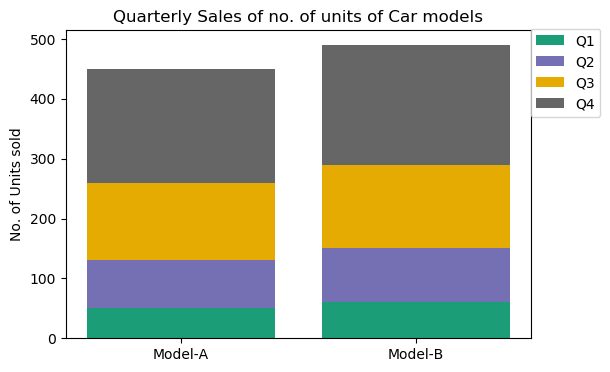

In [327]:
## barplot

fig, ax = plt.subplots(figsize=(6, 4))

for m in np.arange(arr.shape[0]):
    model = model_dict[m]
    for i in np.arange(len(arr_cumsum[m]) - 1):
        if m==0:
            ax.bar(model, arr[m][i], bottom=arr_cumsum[m][i], color=quarter_colors.colors[i], label='Q'+str(i+1))
        else:
            ax.bar(model, arr[m][i], bottom=arr_cumsum[m][i], color=quarter_colors.colors[i])
        

ax.set_title('Quarterly Sales of no. of units of Car models')
ax.set_ylabel('No. of Units sold')
ax.legend(loc=(1.0, 0.72))
plt.show()

### Style 


In [328]:
plt.style.use('dark_background')

In [329]:
sachin = pd.read_excel('./data/sachin.xlsx')

In [330]:
sachin.head(3)

,Score,Against,Format,Ground,Date
0,119*,England,Test,Manchester,1990-09-08 00:00:00
1,148*,Australia,Test,Sydney,1992-02-01 00:00:00
2,114,Australia,Test,Perth,1992-01-02 00:00:00


In [331]:
sachin.dtypes

Score      object
Against    object
Format     object
Ground     object
Date       object
dtype: object

In [332]:
# Add a column NOt_Out, it is True when score has astrik
sachin['Not_Out'] = sachin.Score.str.contains(pat='*', regex=False)==True

In [333]:
# remoce astrik from score 
sachin.loc[sachin.Not_Out, ['Score']] = sachin.Score[sachin.Not_Out].str.replace('*','',regex=False)

In [334]:
# convert score as int type
sachin['Score'] = sachin.Score.astype('int')

In [335]:
# Check datatypes 
sachin.dtypes

Score       int32
Against    object
Format     object
Ground     object
Date       object
Not_Out      bool
dtype: object

In [336]:
sachin.head(3)

,Score,Against,Format,Ground,Date,Not_Out
0,119,England,Test,Manchester,1990-09-08 00:00:00,True
1,148,Australia,Test,Sydney,1992-02-01 00:00:00,True
2,114,Australia,Test,Perth,1992-01-02 00:00:00,False


In [337]:
# Data prep

cent_bycount = sachin.groupby(['Against', 'Format'])['Score'].\
                        apply(lambda x : len(x)).\
                        reset_index().\
                        rename(columns={'Score':'Centuries'})

odi_cent = cent_bycount.loc[cent_bycount.Format=='ODI',['Against', 'Centuries']]
test_cent = cent_bycount.loc[cent_bycount.Format=='Test',['Against', 'Centuries']]

odi_cent.set_index('Against', inplace=True)
test_cent.set_index('Against', inplace=True)

In [338]:
# look at odi_cent
odi_cent.head(3)

,Centuries
Against,
Australia,9
Bangladesh,1
England,2


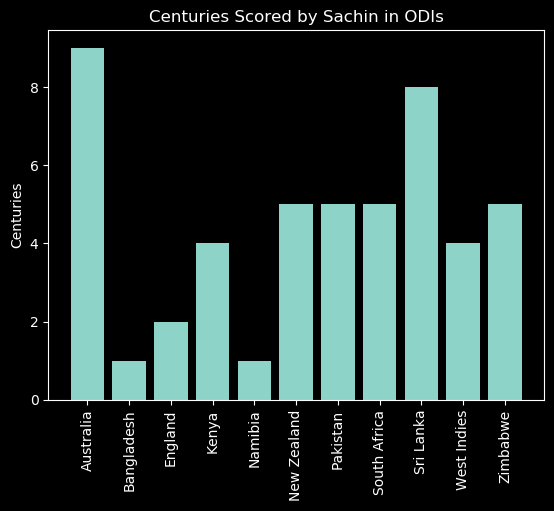

In [339]:
## ODI Centuries

fig, ax = plt.subplots()
indx_count = np.arange(len(odi_cent.index))

odibars = ax.bar(indx_count, 'Centuries', data = odi_cent)

ax.set_ylabel('Centuries')
ax.set_xticks(indx_count)
ax.set_xticklabels(odi_cent.index, rotation=90)
ax.set_title('Centuries Scored by Sachin in ODIs')
plt.show()

### Change Style
                  

In [340]:
plt.style.use('ggplot')

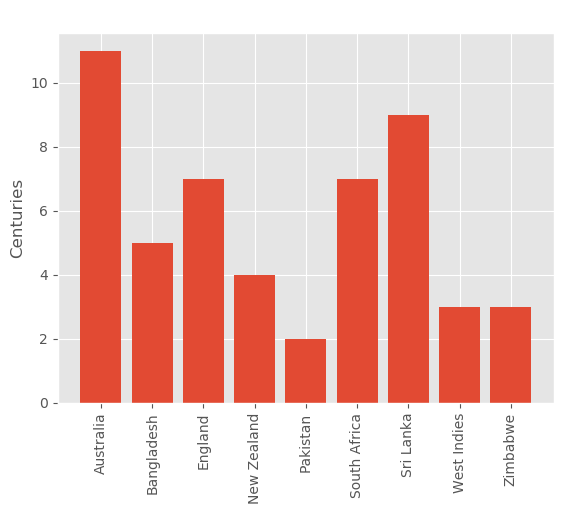

In [341]:
## Test Centuries

fig, ax = plt.subplots()
indx_count = np.arange(len(test_cent.index))

testbars = ax.bar(indx_count, 'Centuries', data = test_cent)

ax.set_ylabel('Centuries')
ax.set_xticks(indx_count)
ax.set_xticklabels(test_cent.index, rotation=90)
ax.set_title('Centuries Scored by Sachin in Test matches')
plt.show()